# Assignment 8

Imports:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib ipympl

Now we define the system parameters:

In [24]:
# Main system parameters: number of mics, number of samples in time
Nmics = 64
Nsamp = 200

# Source: x,y coordinates: x: 0+, y: [-Y, +Y] where Y determined by pitch and Nmics
src = (0, 0)
# Spacing between microphones
pitch = 0.1
# proxy for sampling rate
dist_per_samp = 0.1

# Speed of sound in the medium
C = 2

# Time dilation factor for sinc pulse: how narrow
SincP = 1
# CODE Locations of microphones
mics = []
    
# Location of point obstacle
obstacle = (3, -1)

Now we create the waveform emitted by the source

In [3]:
# CODE Nsamp time instants with spacing of dist_per_samp
def wsrc(t):
    return np.sinc(SincP*t)
# plt.plot(t, wsrc(t))
# plt.show()

Now, a function to find the distance from src to mic after reflection through a point pt

In [4]:
# Distance from src to a mic after reflecting through pt
def dist(src, pt, mic):
    d1 = np.sqrt((src[0]-pt[0])**2 + (src[1]-pt[1])**2) # CODE distance from src to pt
    d2 = np.sqrt((mic[0]-pt[0])**2 + (mic[1]-pt[1])**2) # CODE distance from pt to mic
    return d1 + d2

## Setup and Generating Mic Output
Now we create the output of the microphones assuming that the source emits a
wave starting from time 0. We assume there is only a single obstacle present, so each microphone will
get back a reflected wave that has been delayed by an amount of time given by the time required to
travel from the source to the obstacle and back to that mic.

10.0


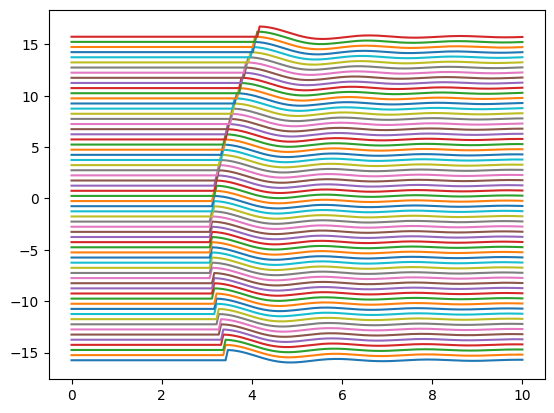

In [28]:
#for both odd and even cases
if Nmics % 2 == 0:
    for element in range(-int(Nmics/2), int(Nmics/2)):
      mics.append((0,pitch/2 + element*pitch))
else:
    for element in range(-int(Nmics/2), int((Nmics+1)/2)):
      mics.append((0,element*pitch))

mic_op = np.zeros((Nmics, Nsamp))

time = np.linspace(0, Nsamp*dist_per_samp/C, Nsamp)

print(time[-1])

offset=0
for i in range(Nmics):
    del_t = dist(src, obstacle, mics[i]) / C
    mic_op[i, :] = np.where(time < del_t, 0, wsrc(time - del_t))
    plt.plot(time, mic_op[i, :] + mics[i][1] * 5)
    offset -= 1

mic_op=np.array(mic_op)
plt.show()

Now we show the heatmap for the same data

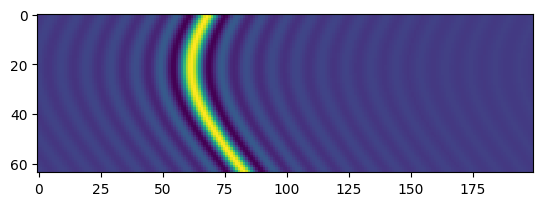

In [10]:
heatmap = plt.imshow(mic_op, cmap='viridis', interpolation='nearest')
plt.show()

Now we apply the Delay and Sum Algorithm

In [19]:
htmap = np.zeros((64,200))

for i in range(Nsamp):
    for j in range(Nmics):
        val = 0
        pt = (i*dist_per_samp,mics[j][1])
        for k in range(Nmics):
            delay = dist(src,pt,mics[k])/C
            # print(delay)
            for t in time:
                if t >= delay :
                    samp_time = t
                    break

            t_idx = np.where(time == samp_time)
            val += mic_op[k][t_idx]
        htmap[i][j-1] = val

plt.imshow(htmap)


IndexError: index 64 is out of bounds for axis 0 with size 64